# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [2]:
df_tracks = pd.read_parquet("data/tracks.parquet")
df_catalog = pd.read_parquet("data/catalog_names.parquet")
df_interactions = pd.read_parquet("data/interactions.parquet")

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

## tracks

In [20]:
df_tracks.sample(10)

,track_id,albums,artists,genres
200910,7321791,[774452],[302220],"[19, 325]"
950019,85301475,[16265111],"[3426001, 11117116]",[16]
849404,68480226,[11357176],[2834315],"[11, 20]"
933470,81342099,"[15040575, 15261329, 15380084, 15668394, 16106...","[239112, 3152358]","[127, 335]"
477750,33107564,"[4042800, 4215556, 4502312, 4713774, 6090778, ...",[1611350],"[68, 127, 335]"
784177,60883696,[9447822],[8502216],"[2, 102]"
849891,68560623,"[11377666, 11377689, 12621649, 16579667]",[200277],[11]
720142,53446122,[7637361],[603307],[21]
470021,32671135,[3984213],[1582314],"[11, 20]"
730264,54570565,[7879607],[3277095],[11]


In [21]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980977 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   track_id  980977 non-null  int64 
 1   albums    980977 non-null  object
 2   artists   980977 non-null  object
 3   genres    980977 non-null  object
dtypes: int64(1), object(3)
memory usage: 37.4+ MB


In [22]:
df_tracks.isna().sum()

track_id    0
albums      0
artists     0
genres      0
dtype: int64

In [31]:
df_tracks.track_id.duplicated().sum()

0

In [23]:
for item in df_tracks.columns[1: ]:
    isna = df_tracks[item].apply(lambda x: len(x) == 0).sum()
    print(f"{item}_isna: {isna}")

albums_isna: 0
artists_isna: 0
genres_isna: 0


## catalog_names

In [24]:
df_catalog.sample(10)

,id,type,name
916712,1357112,track,Voices
1054404,14562406,track,Waters Rising
916491,1345767,track,الله على حبك
1225342,28343229,track,Birthday
421246,8152385,album,The Hype
301393,4922027,album,Sometimes
1156923,23127684,track,Lindy Lou
1045422,12800698,track,Lights Out
1258885,31169727,track,Атлантида
86866,881022,album,Samorost2


In [25]:
df_catalog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793448 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 54.7+ MB


In [32]:
df_catalog[['id', 'type']].duplicated().sum()

0

In [26]:
df_catalog.isna().sum()

id      0
type    0
name    0
dtype: int64

In [27]:
df_catalog.groupby('type').agg({'id': 'count'})

,id
type,
album,658724
artist,153581
genre,166
track,980977


## interactions

In [28]:
df_interactions.sample(10)

,user_id,track_id,track_seq,started_at
245,718698,3719794,246,2022-05-11
234,128252,15867060,235,2022-05-02
18,301992,32226743,19,2022-09-16
31,160884,60073,32,2022-05-30
118,201981,74682737,119,2022-09-19
120,197956,38883870,121,2022-12-12
288,969546,80408246,289,2022-12-11
118,388635,87834364,119,2022-12-04
480,488948,48591698,481,2022-08-09
73,1209760,27032843,74,2022-07-30


In [29]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222184449 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [30]:
df_catalog.isna().sum()

id      0
type    0
name    0
dtype: int64

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

Итог:
- Типы данных были считаны корректно. Нет необходимости в преобразовании или трансформации. 
- Есть пропущенные значения в датасете df_tracks. Наличие таких записей снижает качество данных и ограничивает применение большинства рекомендательных алгоритмов, поэтому необходимо удалить строки пропусками из датачсета.
- Необходимо удалить взаимодействия пользователей, связанные с треками из пункта 2.


In [3]:
info_isna = (
    (df_tracks['albums'].apply(lambda x: len(x) == 0)) 
    | (df_tracks['artists'].apply(lambda x: len(x) == 0)) 
    | (df_tracks['genres'].apply(lambda x: len(x) == 0))
)

In [4]:
print(f"Треков с 1 и более пропусков: {df_tracks[info_isna].shape[0]}")

Треков с 1 и более пропусков: 19023


In [5]:

track_id = df_tracks[info_isna].track_id
df_tracks = df_tracks[~ df_tracks.track_id.isin(track_id)]
df_interactions = df_interactions[~df_interactions.track_id.isin(track_id)]
df_catalog = df_catalog[~ ((df_catalog.id.isin(track_id)) & (df_catalog.type == 'track') )]


# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

In [6]:
df_count_track = df_interactions.groupby(['user_id'], as_index=False)\
    .agg({'track_id': 'count'}).rename(columns={'track_id': 'track_c'})
df_count_track.head()

,user_id,track_c
0,0,26
1,1,36
2,2,14
3,3,33
4,4,255


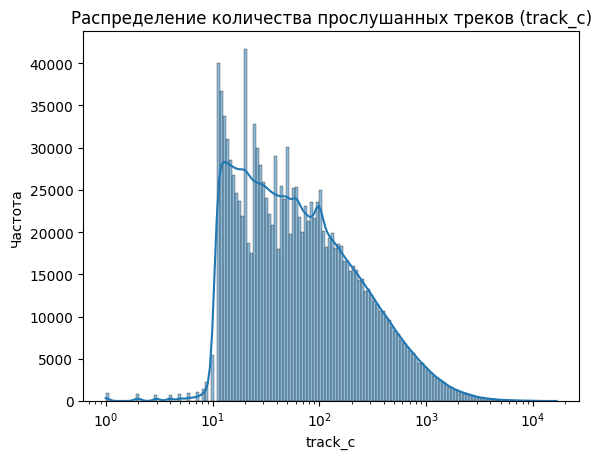

In [11]:
sns.histplot(data=df_count_track, x="track_c", kde=True, log_scale=True, bins=150)
plt.title("Распределение количества прослушанных треков (track_c)")
plt.xlabel("track_c")
plt.ylabel("Частота")
plt.show()

Наиболее популярные треки

In [12]:
df_track_popular = df_interactions.groupby(['track_id'], as_index=False)\
    .agg({'user_id': 'count'}).rename(columns={'user_id': 'user_с'})
df_track_popular.head()

,track_id,user_с
0,26,5
1,38,8
2,135,16
3,136,7
4,138,17


In [14]:
df_track_popular_top = df_track_popular.sort_values('user_с', ascending=False).head(10)

In [18]:
df_track_popular_top = df_track_popular_top.merge(df_catalog.query("type == 'track'"), left_on='track_id', right_on='id', how='inner')
df_track_popular_top

,track_id,user_с,id,type,name
0,53404,111062,53404,track,Smells Like Teen Spirit
1,33311009,106921,33311009,track,Believer
2,178529,101924,178529,track,Numb
3,35505245,99490,35505245,track,I Got Love
4,65851540,86670,65851540,track,Юность
5,24692821,86246,24692821,track,Way Down We Go
6,32947997,85886,32947997,track,Shape of You
7,51241318,85244,51241318,track,In The End
8,795836,85042,795836,track,Shape Of My Heart
9,45499814,84748,45499814,track,Life


Наиболее популярные жанры

In [37]:
df_genres_exploded = df_tracks.explode('genres')

In [43]:
df_genres_popular = df_track_popular.merge(df_genres_exploded, on='track_id', how='inner')
df_genres_popular = df_genres_popular.groupby('genres', as_index=False).agg({'user_с': 'sum'})

In [50]:
df_genres_popular_top = df_genres_popular.sort_values('user_с', ascending=False).head(10)
df_genres_popular_top = df_genres_popular_top.merge(df_catalog.query("type == 'genre'"), left_on='genres', right_on='id', how='inner')

In [51]:
df_genres_popular_top

,genres,user_с,id,type,name
0,11,55578305,11,genre,pop
1,75,37799821,75,genre,rap
2,102,31091989,102,genre,allrock
3,20,26626234,20,genre,ruspop
4,3,25303695,3,genre,rusrap
5,68,20120694,68,genre,electronics
6,16,16291557,16,genre,dance
7,2,13166147,2,genre,rusrock
8,14,12772620,14,genre,rock
9,47,12437375,47,genre,metal


Треки, которые никто не прослушал

In [54]:
df_track_no_listen = df_track_popular.merge(df_tracks, on='track_id', how='right')
df_track_no_listen = df_track_no_listen[df_track_no_listen.user_с.isna()]

In [57]:
df_track_no_listen.shape[0]

0

# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [ ]:
df_items = df_tracks.rename(columns={'track_id': 'item_id'}).copy()

df_events = df_interactions.rename(columns={'track_id': 'item_id'}).copy()

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [ ]:
df_items.to_parquet('data/items.parquet')
df_events.to_parquet('data/events.parquet')

In [ ]:
import boto3
import os
 
def get_session():
    session = boto3.session.Session()
 
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
    )
 
bucket_name = "s3-student-mle-20250513-c87f7369b8-freetrack"
s3_folder = "recsys/" 
local_files_path = ["data/items.parquet", "data/events.parquet"]

s3 = get_session()


for item in local_files_path:
    s3.upload_file(item, bucket_name, s3_folder + item)

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [ ]:
import gc

del df_catalog, df_events, df_items, df_tracks, df_interactions
gc.collect()

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [2]:
df_items = pd.read_parquet("data/items.parquet")
df_events_full = pd.read_parquet("data/events.parquet")
df_catalog = pd.read_parquet("data/catalog_names.parquet")

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.  
Разбейте данные на тренировочную и тестовую выборки: в тренировочную отнесите все данные до 16 декабря 2022 года (не включительно).

In [3]:
unique_users = df_events_full["user_id"].unique()

# случайно выбираем 10% пользователей
sampled_users = pd.Series(unique_users).sample(frac=0.05, random_state=42).tolist()

# фильтруем исходный датасет, оставляя только выбранных пользователей
df_events = df_events_full[df_events_full["user_id"].isin(sampled_users)]

In [ ]:
import pandas as pd

def train_test_split_by_date(df: pd.DataFrame, date_col: str, split_date: str):

    # Возьмем только 10% данных по датам, ядро и мои нервы не справляются...

    df = df.copy()
    all = df.shape[0]
    df[date_col] = pd.to_datetime(df[date_col])
    
    train = df[df[date_col] < pd.Timestamp(split_date)]
    test = df[df[date_col] >= pd.Timestamp(split_date)]

    print(f"Train shape: {train.shape}, Test shape: {test.shape}")
    print(f"Train persent: {round(train.shape[0] / all, 2)}, Test persent: {round(test.shape[0] / all, 2)}")
    print(f"Граница разделения: {split_date}")
    print(f"Train период: {train[date_col].min().date()} — {train[date_col].max().date()}")
    print(f"Test период:  {test[date_col].min().date()} — {test[date_col].max().date()}")

    return train, test

events_train, events_test = train_test_split_by_date(df_events, 'started_at', '2022-12-16')

Train shape: (10486991, 4), Test shape: (696437, 4)
Train persent: 0.94, Test persent: 0.06
Граница разделения: 2022-12-16
Train период: 2022-01-01 — 2022-12-15
Test период:  2022-12-16 — 2022-12-31


# Топ популярных

Рассчитаем рекомендации как топ популярных.

Будем брать данные только из трейна 

In [12]:
df_track_top = events_train\
    .groupby('item_id', as_index=False)\
    .agg({'user_id': 'nunique'})\
    .rename(columns={'user_id': 'unique_user_c'})\
    .sort_values('unique_user_c', ascending=False)\
    .head(100)

In [13]:
df_track_top.head()

,item_id,unique_user_c
2801,53404,565
107151,33311009,494
113624,35505245,477
7666,178529,459
94044,29544272,439


In [14]:
path_top_100 = "recommendations/top_popular.parquet"
df_track_top.to_parquet(path_top_100)

In [ ]:
import boto3
import os
 
def get_session():
    session = boto3.session.Session()
 
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
    )
 
bucket_name = "s3-student-mle-20250513-c87f7369b8-freetrack"
s3_folder = "recsys/" 
local_files_path = [path_top_100]

s3 = get_session()


for item in local_files_path:
    s3.upload_file(item, bucket_name, s3_folder + item)

# Персональные

Рассчитаем персональные рекомендации.  
Так как track_seq — номер места трека в истории пользователя, будем использовать это значение как рейтинг

In [5]:
import scipy
import sklearn.preprocessing

user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(df_events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(df_items["item_id"])
df_items["item_id_enc"] = item_encoder.transform(df_items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

In [6]:
import pickle

with open('model/user_encoder.pkl', 'wb') as file:
    pickle.dump(user_encoder, file)

with open('model/item_encoder.pkl', 'wb') as file:
    pickle.dump(item_encoder, file)

In [7]:
events_train["track_seq_bin"] = 1

user_item_matrix_train = scipy.sparse.csr_matrix(
    (
        events_train["track_seq"].values,                 # значения в матрице (кол-во прослушиваний)
        (events_train["user_id_enc"].values, events_train["item_id_enc"].values)  # индексы (user, item)
    ),
    dtype=np.int8
)

In [8]:
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train) 

/home/mle-user/env_recsys_start/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mle-user/env_recsys_start/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 50/50 [04:17<00:00,  5.16s/it]


In [9]:
als_model.save("model/als_model")

In [10]:
als_model = AlternatingLeastSquares().load("model/als_model.npz")


In [12]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = list(range(len(user_encoder.classes_)))

# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train, 
    filter_already_liked_items=False, 
    N=10
) 

# als_model.recommend(userid=user_ids_encoded[0], user_items=user_item_matrix_train[0], filter_already_liked_items=False)

In [13]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

In [14]:
als_recommendations = als_recommendations[["user_id", "item_id", "score"]]
als_recommendations.to_parquet("recommendations/personal_als.parquet")

In [ ]:
import boto3
import os
 
def get_session():
    session = boto3.session.Session()
 
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
    )
 
bucket_name = "s3-student-mle-20250513-c87f7369b8-freetrack"
s3_folder = "recsys/" 
local_files_path = ['recommendations/personal_als.parquet']

s3 = get_session()


for item in local_files_path:
    s3.upload_file(item, bucket_name, s3_folder + item)

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [15]:
# Загружаем данные 

import pickle

with open('model/user_encoder.pkl', 'rb') as file:
    user_encoder = pickle.load(file)

with open('model/item_encoder.pkl', 'rb') as file:
    item_encoder = pickle.load(file)

als_recommendations = pd.read_parquet("recommendations/personal_als.parquet")

In [20]:
item_list = als_recommendations.groupby('item_id', as_index=False).agg({'user_id': 'count'}).query("user_id > 5")['item_id']
als_recommendations = als_recommendations[als_recommendations['item_id'].isin(item_list)]

In [ ]:
# Получаем уникальные закодированные идентификаторы всех объектов из events_train
train_item_ids_enc = events_train['item_id_enc'].unique()

max_similar_items = 10

# Используем ALS-модель для получения похожих объектов
# Метод similar_items возвращает также сам объект, поэтому запрашиваем на 1 больше
similar_items_res = als_model.similar_items(train_item_ids_enc, N=max_similar_items + 1)

# Разделяем результат на идентификаторы и оценки сходства
sim_item_item_ids_enc, sim_item_scores = similar_items_res

# Преобразуем в DataFrame
similar_items = pd.DataFrame({
    "item_id_enc": train_item_ids_enc,
    "sim_item_id_enc": sim_item_item_ids_enc.tolist(),
    "cnt_score": sim_item_scores.tolist()
})

# "Взрываем" списки, чтобы каждая пара оказалась в отдельной строке
similar_items = similar_items.explode(["sim_item_id_enc", "cnt_score"], ignore_index=True)

# Приводим типы данных
similar_items["sim_item_id_enc"] = similar_items["sim_item_id_enc"].astype(int)
similar_items["cnt_score"] = similar_items["cnt_score"].astype(float)

# Декодируем обратно в оригинальные идентификаторы
similar_items["item_id_1"] = item_encoder.inverse_transform(similar_items["item_id_enc"])
similar_items["item_id_2"] = item_encoder.inverse_transform(similar_items["sim_item_id_enc"])

# Убираем ненужные закодированные колонки
similar_items = similar_items.drop(columns=["item_id_enc", "sim_item_id_enc"])

# Исключаем пары, где объект совпадает с самим собой
similar_items = similar_items.query("item_id_1 != item_id_2")

# Просмотрим результат
similar_items.head()


In [ ]:
similar_items.to_parquet("recommendations/similar.parquet")

In [ ]:
import boto3
import os
 
def get_session():
    session = boto3.session.Session()
 
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
    )
 
bucket_name = "s3-student-mle-20250513-c87f7369b8-freetrack"
s3_folder = "recsys/" 
local_files_path = ['recommendations/similar.parquet']

s3 = get_session()


for item in local_files_path:
    s3.upload_file(item, bucket_name, s3_folder + item)

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

Добавим признаки: 
- популярный ли трек 
- предпочтение по жанрам 
- предпочтение по исполнителям


In [64]:
candidates = als_recommendations.copy()

item_popularity = events_train.groupby('item_id').size().reset_index(name='item_pop')
candidates = candidates.merge(item_popularity, on='item_id', how='left').fillna(0)

In [65]:
candidates.head()

,user_id,item_id,score,item_pop
0,23,25727188,1.236137,1947.0
1,23,25871686,1.168590,1252.0
2,23,24745650,1.162974,1154.0
3,23,26285336,1.159571,1562.0
4,23,25104046,1.138812,626.0


In [ ]:
# Присоединим метаданные
train_meta = events_train.merge(df_items[['item_id', 'artists', 'genres']], on='item_id')

# Вспомогательные таблицы 
train_artists = train_meta.explode('artists')
train_genres = train_meta.explode('genres')

# Любимый исполнитель

# Кол-во прослушиваний каждого артиста каждым пользователем
user_artist_affinity = (
    train_artists.groupby(['user_id', 'artists'])
    .size()
    .reset_index(name='artist_affinity')
)

# Присоединяем артистов к кандидатам и оставляем только любимого артиста
artist_affinity_feature = (
    candidates.merge(df_items[['item_id', 'artists']], on='item_id')
    .explode('artists')
    .merge(user_artist_affinity, on=['user_id', 'artists'], how='left')
    .fillna({'artist_affinity': 0})
    .groupby(['user_id', 'item_id'], as_index=False)['artist_affinity']
    .max()
)

# Добавляем к кандидатам
candidates = candidates.merge(artist_affinity_feature, on=['user_id', 'item_id'], how='left')

In [ ]:

# Любимый жанр

# Кол-во прослушиваний каждого жанра каждым пользователем
user_genre_affinity = (
    train_genres.groupby(['user_id', 'genres'])
    .size()
    .reset_index(name='genre_affinity')
)

# Присоединяем жанры к кандидатам
genre_affinity_feature = (
    candidates.merge(df_items[['item_id', 'genres']], on='item_id')
    .explode('genres')
    .merge(user_genre_affinity, on=['user_id', 'genres'], how='left')
    .fillna({'genre_affinity': 0})
    .groupby(['user_id', 'item_id'], as_index=False)['genre_affinity']
    .max()
)

# Добавляем к кандидатам
candidates = candidates.merge(genre_affinity_feature, on=['user_id', 'item_id'], how='left')

Подготовим данные дня катбуста 

In [68]:
# задаём точку разбиения
split_date_for_labels = pd.to_datetime("2022-12-26") # Возьмем 10 дней

split_date_for_labels_idx = events_test["started_at"] < split_date_for_labels
events_labels = events_test[split_date_for_labels_idx].copy()
events_test_2 = events_test[~split_date_for_labels_idx].copy()

print(events_labels.shape, events_test_2.shape)

(512288, 6) (184149, 6)


In [70]:
# загружаем рекомендации от базовых генераторов
als_recommendations = pd.read_parquet("recommendations/personal_als.parquet")
content_recommendations = pd.read_parquet("recommendations/similar_items.parquet")

events_labels["target"] = 1

columns_from_event = ["user_id", "item_id", "target"]
training_data_for_ranker = candidates.merge(
    events_labels[columns_from_event],
    on=["user_id", "item_id"],
    how="left",
)
training_data_for_ranker["target"] = training_data_for_ranker["target"].fillna(0).astype("int")

In [71]:
training_data_for_ranker.target.value_counts(normalize=True)

target
0    0.998798
1    0.001202
Name: proportion, dtype: float64

In [72]:
# Проведем негативное семплирование
posit = training_data_for_ranker[training_data_for_ranker['target'] == 1]
neg = training_data_for_ranker[training_data_for_ranker['target'] == 0]

# Выбираем в 4 раза больше негативных примеров, чем позитивных
neg_sampled = neg.sample(n=len(posit) * 4, random_state=42)
candidates_training_data = pd.concat([posit, neg_sampled]).sample(frac=1) # Перемешиваем

candidates_training_data.target.value_counts(normalize=True)

target
0    0.8
1    0.2
Name: proportion, dtype: float64

In [73]:
candidates_training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4125 entries, 104886 to 58638
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          4125 non-null   int32  
 1   item_id          4125 non-null   int64  
 2   score            4125 non-null   float64
 3   item_pop         4125 non-null   float64
 4   artist_affinity  4125 non-null   float64
 5   genre_affinity   4125 non-null   float64
 6   target           4125 non-null   int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 241.7 KB


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [74]:
candidates_training_data.head()

,user_id,item_id,score,item_pop,artist_affinity,genre_affinity,target
104886,209850,34483759,0.021968,1577.0,0.0,0.0,0
280691,562899,75944934,0.449842,2406.0,0.0,6.0,0
369652,742251,94696082,0.132324,777.0,0.0,14.0,0
416424,837596,29732355,0.981255,823.0,4.0,36.0,0
168565,338635,93390818,0.127912,1114.0,1.0,7.0,1


In [ ]:
from catboost import CatBoostClassifier, Pool

# Обучение ранжировщика CatBoost
features = ['item_pop', 'artist_affinity', 'genre_affinity']
target = 'target'
train_pool = Pool(
    data=candidates_training_data[features], 
    label=candidates_training_data[target]
)

In [76]:
cb_model = CatBoostClassifier(
    iterations=200, 
    learning_rate=0.1,
    depth=6, 
    auto_class_weights='Balanced',
    verbose=50, 
    random_seed=42, 
)
cb_model.fit(train_pool)

0:	learn: 0.6718002	total: 50.3ms	remaining: 10s
50:	learn: 0.5467172	total: 140ms	remaining: 409ms
100:	learn: 0.5128735	total: 246ms	remaining: 241ms
150:	learn: 0.4674472	total: 515ms	remaining: 167ms
199:	learn: 0.4388417	total: 634ms	remaining: 0us


In [106]:
# Применение ранжировщика (Inference)
candidates['rank'] = cb_model.predict_proba(candidates[features])[:, 1]
candidates = candidates.sort_values(['user_id', 'rank'], ascending=[True, False])

In [107]:
recommendations = candidates.groupby('user_id')['item_id'].apply(list).reset_index()
recommendations.head()

,user_id,item_id
0,23,"[25625890, 25104046, 24745650, 26285333, 26285..."
1,31,"[93126179, 31105795, 86081547, 86710605, 93390..."
2,60,"[16549426, 19044755, 19152669, 19009110, 17352..."
3,76,"[23623599, 22020621, 24427965, 24663745, 22860..."
4,78,"[70975354, 70722650, 72113808, 69055071, 71237..."


In [108]:
recommendations.to_parquet("recommendations/recommendations.parquet")

In [ ]:
import boto3
import os
 
def get_session():
    session = boto3.session.Session()
 
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
    )
 
bucket_name = "s3-student-mle-20250513-c87f7369b8-freetrack"
s3_folder = "recsys/" 
local_files_path = ['recommendations/recommendations.parquet']

s3 = get_session()


for item in local_files_path:
    s3.upload_file(item, bucket_name, s3_folder + item)

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [80]:
def precision_at_k(recs_df: pd.DataFrame, gt_dict: dict[int, list[int]], k: int) -> float:
    """Средняя точность рекомендаций по пользователям (Precision@K)."""
    user_precisions = []

    for user_id, user_recs in recs_df.groupby('user_id'):
        if user_id not in gt_dict:
            continue

        recommended = user_recs.head(k)['item_id'].tolist()
        actual = gt_dict[user_id]
        hits = len(set(recommended) & set(actual))
        user_precisions.append(hits / k)

    return np.mean(user_precisions) if user_precisions else 0.0


def recall_at_k(recs_df: pd.DataFrame, gt_dict: dict[int, list[int]], k: int) -> float:
    """Средняя полнота рекомендаций по пользователям (Recall@K)."""
    user_recalls = []

    for user_id, user_recs in recs_df.groupby('user_id'):
        if user_id not in gt_dict:
            continue

        recommended = user_recs.head(k)['item_id'].tolist()
        actual = gt_dict[user_id]
        hits = len(set(recommended) & set(actual))
        user_recalls.append(hits / len(actual))

    return np.mean(user_recalls) if user_recalls else 0.0


def coverage_at_k(recs_df: pd.DataFrame, all_items: np.ndarray, k: int) -> float:
    """Доля всех возможных треков, попавших в топ-K рекомендаций хотя бы одному пользователю."""
    recommended_items = recs_df.groupby('user_id').head(k)['item_id'].unique()
    return len(recommended_items) / len(all_items)


def novelty_at_k(recs_df: pd.DataFrame, train_interactions: pd.DataFrame, k: int) -> float:
    """Средняя новизна рекомендаций (доля новых треков, которых не было у пользователя в train)."""
    train_user_items = train_interactions.groupby('user_id')['item_id'].apply(set).to_dict()
    user_novelty_scores = []

    for user_id, user_recs in recs_df.groupby('user_id'):
        seen_items = train_user_items.get(user_id, set())
        recommended = user_recs.head(k)['item_id'].tolist()
        unseen_count = len(set(recommended) - seen_items)
        user_novelty_scores.append(unseen_count / k)

    return np.mean(user_novelty_scores) if user_novelty_scores else 0.0


In [110]:
# --- Расчёт метрик ---
metrics = {}

# --- Подготовка данных ---
# Количество топовых рекомендаций
K = 10

# Формируем ground truth: реальные прослушивания из test
test_user_items = events_test_2.groupby('user_id')['item_id'].apply(list).to_dict()

# Все уникальные треки
all_items = events_test_2['item_id'].unique()

# Популярность треков в обучающем датасете
item_popularity_map = events_test_2['item_id'].value_counts(normalize=True)

# Список всех пользователей
all_users = df_events['user_id'].unique()

als_recommendations = pd.read_parquet("recommendations/personal_als.parquet")

recommendations = pd.read_parquet("recommendations/recommendations.parquet")
recommendations = recommendations.explode('item_id')
# --- Топ популярных ---
# Берём топ-K популярных треков
path_top_100 = "recommendations/top_popular.parquet"
top_popular = pd.read_parquet(path_top_100)
top_k_popular = top_popular.head(K)

# Формируем DataFrame рекомендаций:
# каждому пользователю выдаём одни и те же топовые треки
top_popular_recs = pd.DataFrame({
    'user_id': np.repeat(all_users, K),
    'item_id': np.tile(top_k_popular['item_id'], len(all_users))
})

# Вычисляем метрики для "Топ популярных"
metrics['Top Popular'] = {
    'precision@10': precision_at_k(top_popular_recs, test_user_items, K),
    'recall@10': recall_at_k(top_popular_recs, test_user_items, K),
    'coverage@10': coverage_at_k(top_popular_recs, all_items, K),
    'novelty@10': novelty_at_k(top_popular_recs, events_test_2, K)
}

In [111]:
# --- Персонализированные рекомендации (ALS) ---


# Вычисляем метрики для ALS
metrics['Personal ALS'] = {
    'precision@10': precision_at_k(als_recommendations, test_user_items, K),
    'recall@10': recall_at_k(als_recommendations, test_user_items, K),
    'coverage@10': coverage_at_k(als_recommendations, all_items, K),
    'novelty@10': novelty_at_k(als_recommendations, events_test_2, K)
}


In [112]:
# Ранжированная модель 
# Загружаем сохраненные ранее рекомендации
metrics['Final Ranked'] = {
    'precision@10': precision_at_k(recommendations, test_user_items, K),
    'recall@10': recall_at_k(recommendations, test_user_items, K),
    'coverage@10': coverage_at_k(recommendations, all_items, K),
    'novelty@10': novelty_at_k(recommendations, events_test_2, K)
}


# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

In [115]:
pd.DataFrame(metrics).T

,precision@10,recall@10,coverage@10,novelty@10
Top Popular,0.001149,0.001864,0.000156,0.999588
Personal ALS,0.000609,0.003635,0.153798,0.999781
Final Ranked,0.000710,0.003704,0.153798,0.999781


Не хватало оперативной памяти на машинке, очень часто все вылетало и приходилось писать код заново. Неприятно 

#### Top Popular
У данной модели высокая новизна (приблизительно 1), так как большинство популярных треков не совпадают с индивидуальными предпочтениями пользователей.

Однако precision и recall очень низкие — популярные треки плохо отражают реальные интересы пользователей.

Coverage тоже низкий (0.0016), т.к. модель  использует только небольшой набор популярных треков.

#### Personal ALS

ALS показывает значительно выше coverage (≈0.15). Она рекомендует гораздо больше уникальных треков, то есть рекомендации более персонали зированные.

Precision и recall всё ещё низкие, но немного лучше, чем топ популярных. Это указывает на то, что модель частично улавливает вкусы пользователей.

Novelty (≈0.1) заметно ниже — большинство рекомендаций уже знакомы пользователям из train.

#### Final Ranked (оптимальная)
Оптимальная модель. У Final Ranked чуть выше precision и recall, чем у Personal ALS.

Таким образом, она обеспечивает более сбалансированные рекомендации, улучшая точность без потери качества